In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [5]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [6]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
df.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

#### One Hot Encoding

>*I chose to do it with pandas but you can also do it with sklearn*

In [8]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation, prefix='occupation_').astype(int)] , axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass, prefix='workclass_').astype(int)] , axis=1)

df.drop('education', axis=1, inplace=True)

df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status'], prefix='marital-status_').astype(int)] , axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship, prefix='relationship_').astype(int)] , axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country'], prefix='native_country_').astype(int)] , axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df['race'], prefix='race_').astype(int)] , axis=1)

In [9]:
df.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation__?,occupation__Adm-clerical,...,native_country__Thailand,native_country__Trinadad&Tobago,native_country__United-States,native_country__Vietnam,native_country__Yugoslavia,race__Amer-Indian-Eskimo,race__Asian-Pac-Islander,race__Black,race__Other,race__White
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,1,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,1,0,0,0,0,0,0,1
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,1,0,0,0,0,0,0,1
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,1,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,1,0,0,0,0,0,0,1


#### gender encoding

In [10]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

#### income encoding

In [11]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [12]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation__?',
       'occupation__Adm-clerical', 'occupation__Armed-Forces',
       'occupation__Craft-repair', 'occupation__Exec-managerial',
       'occupation__Farming-fishing', 'occupation__Handlers-cleaners',
       'occupation__Machine-op-inspct', 'occupation__Other-service',
       'occupation__Priv-house-serv', 'occupation__Prof-specialty',
       'occupation__Protective-serv', 'occupation__Sales',
       'occupation__Tech-support', 'occupation__Transport-moving',
       'workclass__?', 'workclass__Federal-gov', 'workclass__Local-gov',
       'workclass__Never-worked', 'workclass__Private',
       'workclass__Self-emp-inc', 'workclass__Self-emp-not-inc',
       'workclass__State-gov', 'workclass__Without-pay',
       'marital-status__Divorced', 'marital-status__Married-AF-spouse',
       'marital-status__Married-civ-spouse',
       'marital-status__Married-

<Axes: >

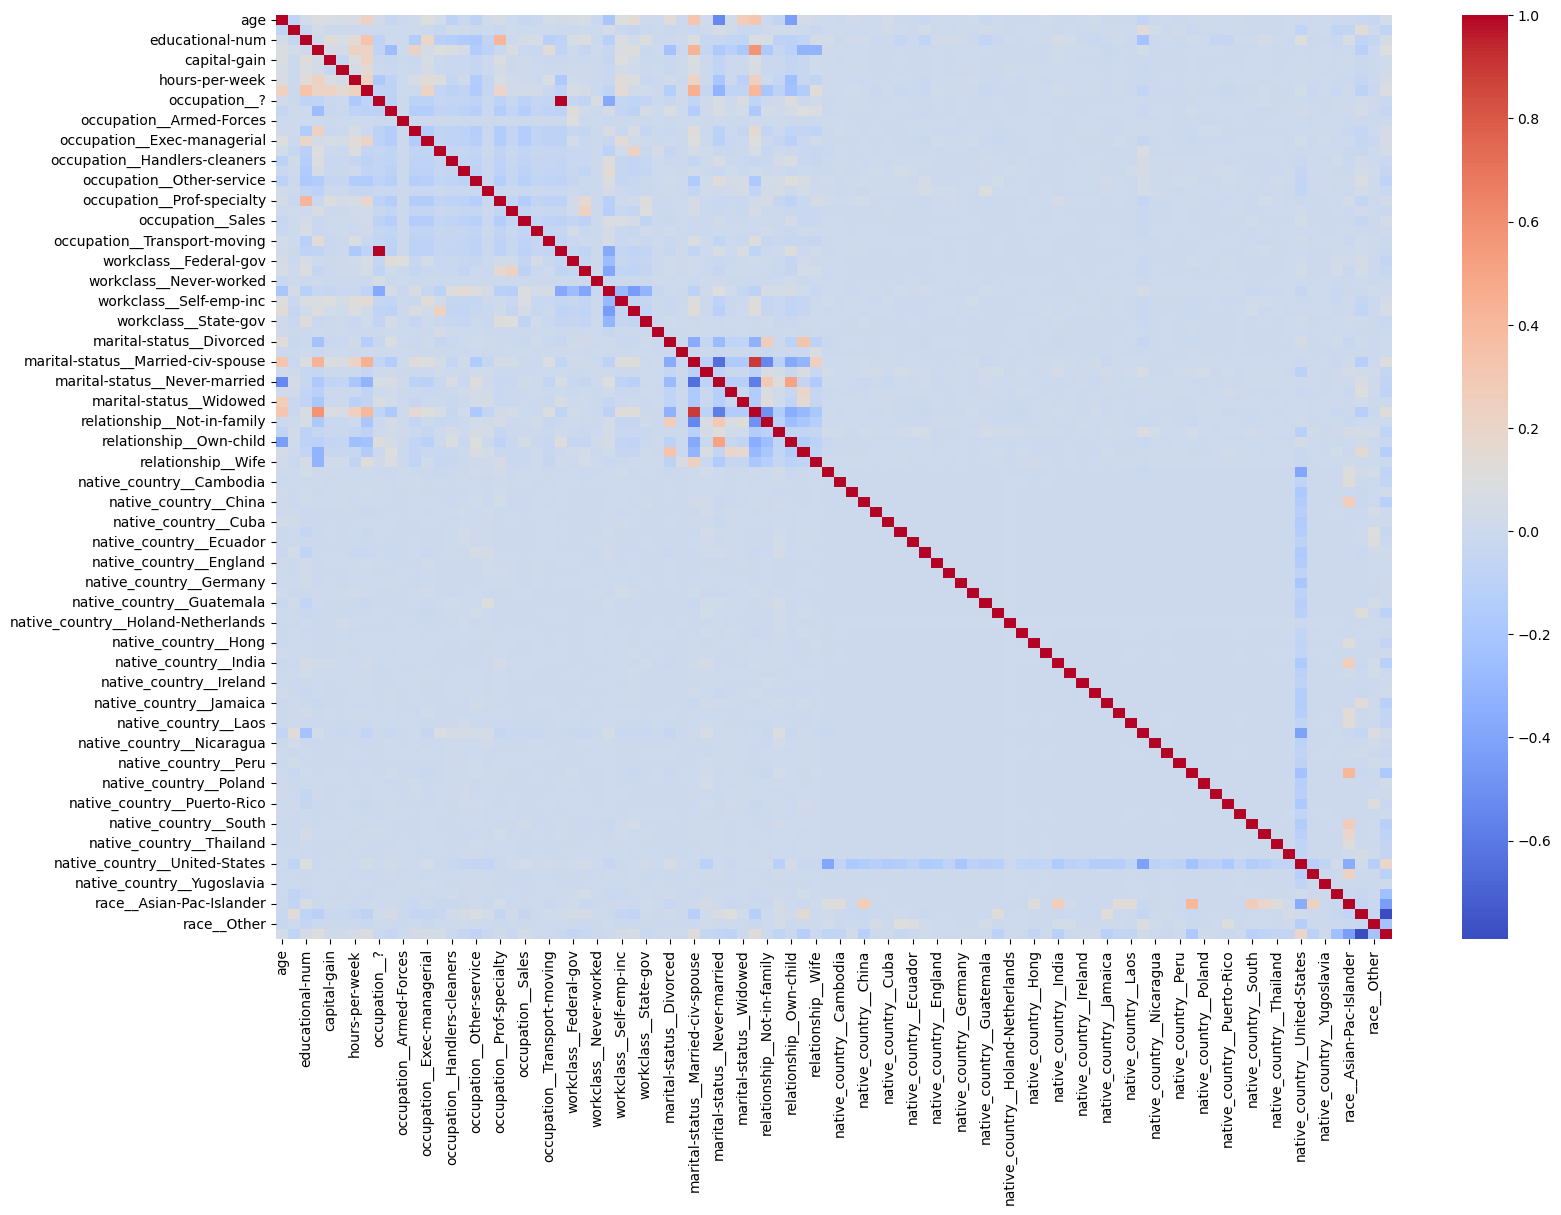

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

#### filtering

In [14]:
corre = df.corr()['income'].abs()
sorted_corre = corre.sort_values()
num_col_drop = int(0.8 * len(df.columns))
col_drop = sorted_corre.iloc[:num_col_drop].index
df_dropped = df.drop(col_drop, axis=1) 


In [15]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation__Exec-managerial,occupation__Other-service,occupation__Prof-specialty,workclass__Self-emp-inc,marital-status__Divorced,marital-status__Married-civ-spouse,marital-status__Never-married,relationship__Husband,relationship__Not-in-family,relationship__Own-child,relationship__Unmarried,relationship__Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

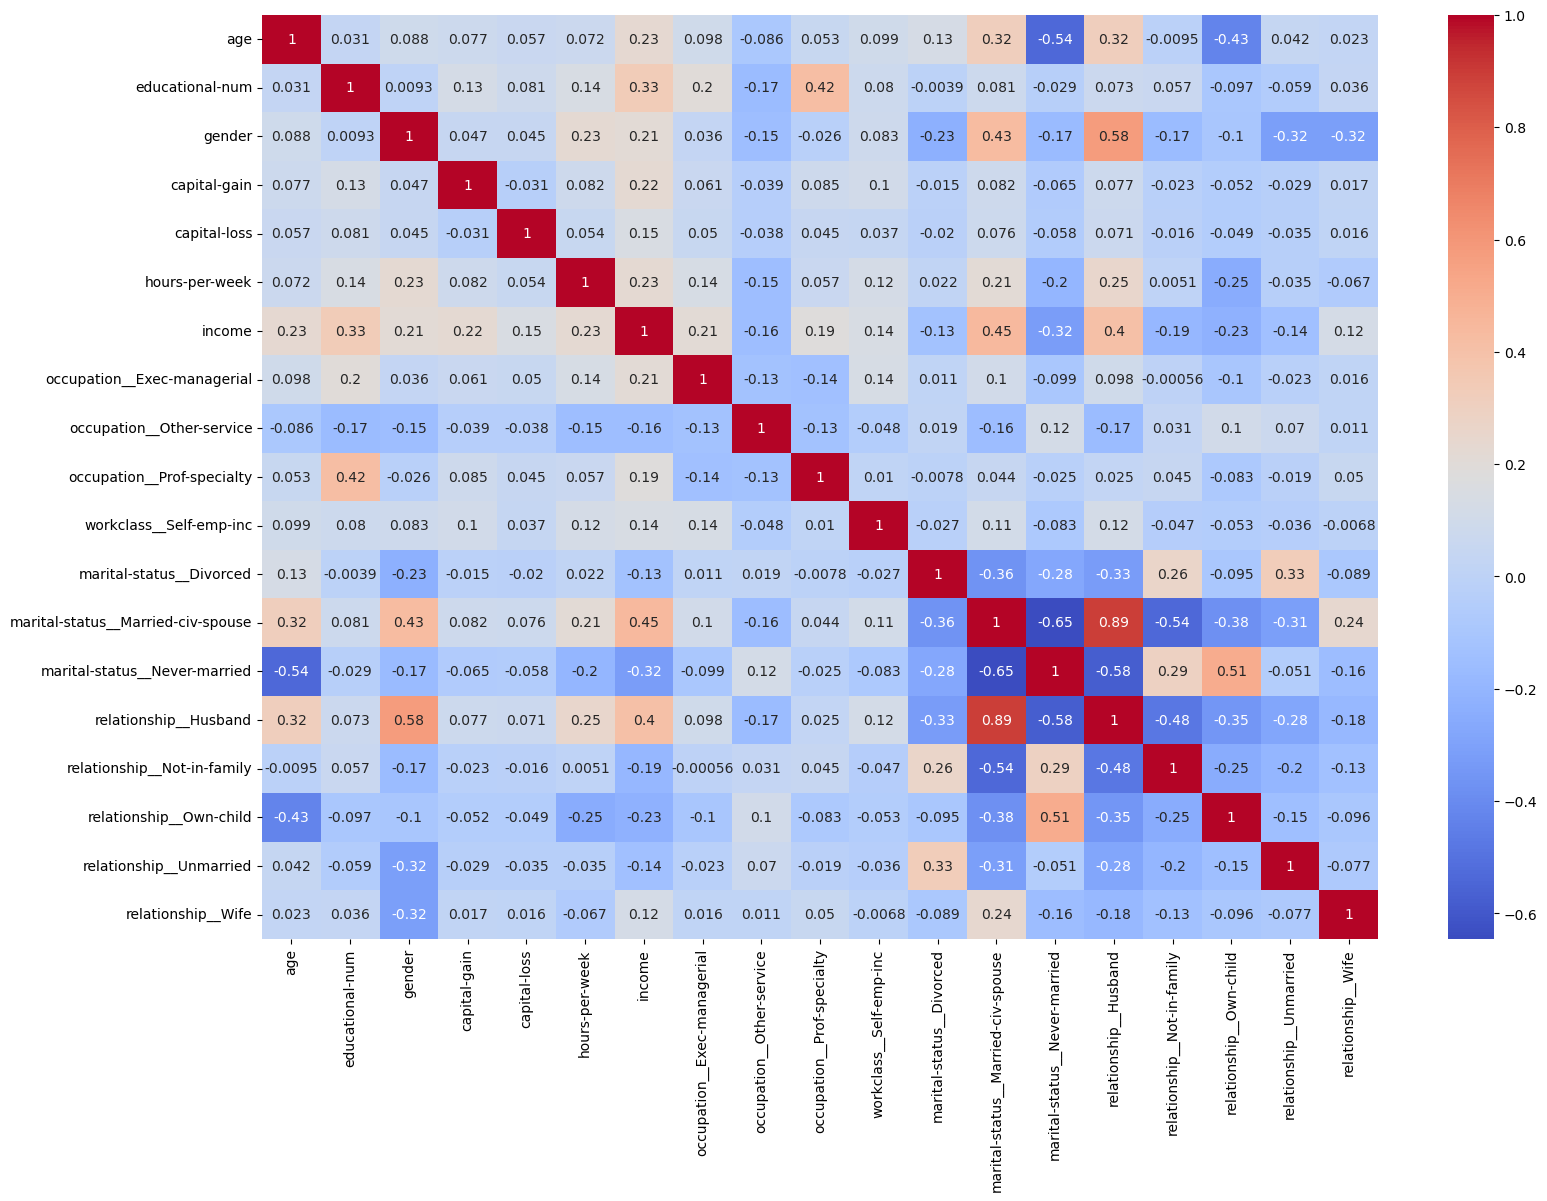

In [16]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

>*the highest correlated with income: 'marital-status','education lvl', 'age', 'gender','capital gain','hours worked'* 

#### Model Creation

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)


In [18]:
train_df , test_df = train_test_split(df, test_size=0.2)


In [19]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation__?,occupation__Adm-clerical,occupation__Armed-Forces,...,native_country__Thailand,native_country__Trinadad&Tobago,native_country__United-States,native_country__Vietnam,native_country__Yugoslavia,race__Amer-Indian-Eskimo,race__Asian-Pac-Islander,race__Black,race__Other,race__White
24057,27,9,0,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
43280,60,11,0,0,0,37,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8934,53,9,1,0,0,45,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
38269,70,9,0,0,0,28,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
28262,46,10,1,0,1977,50,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43593,40,13,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25963,27,9,1,0,0,50,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
44639,62,10,1,0,0,45,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
30458,19,8,1,0,0,20,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [20]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation__?,occupation__Adm-clerical,occupation__Armed-Forces,...,native_country__Thailand,native_country__Trinadad&Tobago,native_country__United-States,native_country__Vietnam,native_country__Yugoslavia,race__Amer-Indian-Eskimo,race__Asian-Pac-Islander,race__Black,race__Other,race__White
47749,35,14,1,7298,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21448,49,10,1,7298,0,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
34488,44,13,0,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
41954,30,13,1,0,0,72,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
22052,46,14,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25467,30,9,1,0,0,50,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
35120,66,12,1,2290,0,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1829,47,10,1,5178,0,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
44163,41,10,0,0,0,40,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [21]:
train_X = train_df.drop('income', axis=1)
train_Y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_Y = test_df['income']

In [22]:
forest = RandomForestClassifier()

In [23]:
forest.fit(train_X,train_Y)

RandomForestClassifier()

In [24]:
forest.score(test_X,test_Y)

0.8456341488381616

>*85% accuracy, nice!*

In [25]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))

In [26]:
importances

{'age': 0.23009242674124586,
 'educational-num': 0.12792495513806146,
 'gender': 0.014664267554857556,
 'capital-gain': 0.11354922922032129,
 'capital-loss': 0.038645552932510825,
 'hours-per-week': 0.11536341059944463,
 'occupation__?': 0.0018057163536669613,
 'occupation__Adm-clerical': 0.005133579650096618,
 'occupation__Armed-Forces': 0.0001027513196827035,
 'occupation__Craft-repair': 0.006320144213459584,
 'occupation__Exec-managerial': 0.01920612945533441,
 'occupation__Farming-fishing': 0.004905628563410661,
 'occupation__Handlers-cleaners': 0.0033473892794466465,
 'occupation__Machine-op-inspct': 0.004491050404265065,
 'occupation__Other-service': 0.00883374276334784,
 'occupation__Priv-house-serv': 0.0001798889603517336,
 'occupation__Prof-specialty': 0.01583180864837697,
 'occupation__Protective-serv': 0.0030865527686052894,
 'occupation__Sales': 0.006193855485183717,
 'occupation__Tech-support': 0.0043576852327764076,
 'occupation__Transport-moving': 0.004312425810049085,
 

>*they're not sorted well, I'll adjust that*

In [27]:
importances = {k:v for k,v in sorted(importances.items(), key=lambda x: x[1],  reverse=True)}

In [28]:
importances

{'age': 0.23009242674124586,
 'educational-num': 0.12792495513806146,
 'hours-per-week': 0.11536341059944463,
 'capital-gain': 0.11354922922032129,
 'marital-status__Married-civ-spouse': 0.054368310454490934,
 'relationship__Husband': 0.05042118812425333,
 'capital-loss': 0.038645552932510825,
 'marital-status__Never-married': 0.03145259158425193,
 'occupation__Exec-managerial': 0.01920612945533441,
 'occupation__Prof-specialty': 0.01583180864837697,
 'gender': 0.014664267554857556,
 'relationship__Not-in-family': 0.013163057378424034,
 'relationship__Wife': 0.010905153608626263,
 'workclass__Private': 0.00948330459303377,
 'occupation__Other-service': 0.00883374276334784,
 'workclass__Self-emp-not-inc': 0.008477606109760507,
 'relationship__Own-child': 0.00830368429822897,
 'marital-status__Divorced': 0.006843133697229619,
 'occupation__Craft-repair': 0.006320144213459584,
 'native_country__United-States': 0.006197967163265632,
 'occupation__Sales': 0.006193855485183717,
 'workclass__

>*RandomForest says that 'age','educational background' and 'hours-per-week' are the most important features for income*

#### Hyperparameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {
    'n_estimators': [50, 100,250],
    'max_depth': [5,10,30,None],
    'min_samples_split':[2,4],
    'max_features': ['sqrt', 'log2']
}

In [33]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,verbose=10)

In [35]:
grid_search

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [ ]:
grid_search.fit()